# Limpiza de datos 

## Preparacion del DataSet

Importar Pandas

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
import seaborn as sns

Se importa DataSet para la creacion del DataFrame



In [14]:
df = pd.read_csv("../dataset/taco_sales_2024-2025.csv") 

Se utiliza el atributo head para mostrar las primeras filas del DataFrame

In [15]:
df.head(10)

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
5,678856,Urban Tacos,San Antonio,07-10-2024 21:21,07-10-2024 22:44,83,Regular,Beef Taco,0,16.70,3.00,2.32,False
6,183667,Taco Haven,Los Angeles,22-10-2024 06:03,22-10-2024 06:48,45,Large,Veggie Taco,1,9.57,5.75,0.63,False
7,379946,El Taco Loco,San Antonio,08-05-2025 04:51,08-05-2025 05:22,31,Regular,Chicken Taco,3,9.80,6.75,2.97,False
8,771088,The Taco Stand,Houston,08-09-2024 21:04,08-09-2024 21:21,17,Regular,Beef Taco,2,10.33,5.50,0.33,True
9,694731,Casa del Taco,Houston,24-05-2025 02:15,24-05-2025 03:28,73,Large,Fish Taco,1,6.99,5.75,1.23,True


In [16]:
df.duplicated(subset='Order ID').sum()

np.int64(0)

Se utiliza el atributo de *info* para mostrar los tipos de datos y ver si existen valores nulos

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


El atributo shape Entrega el número de filas y columnas.

In [18]:
df.shape

(1000, 13)

# Tratamiendo de valores nulos o faltantes

El metodo df.isnull() nos devolvera un DataFrame booleano con *True* donde hay valores nulos.

Para el caso de nuestro DataFrame, no se encuentran valores *nulos*

In [19]:
df.isnull()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


El metedo *df.isnull().sum()*, cuenta cuántos nulos hay por columna.
Lo usamos para corroborar la informacion de anterior de el metodo *df.isnull()*

In [20]:
df.isnull().sum()


Order ID                   0
Restaurant Name            0
Location                   0
Order Time                 0
Delivery Time              0
Delivery Duration (min)    0
Taco Size                  0
Taco Type                  0
Toppings Count             0
Distance (km)              0
Price ($)                  0
Tip ($)                    0
Weekend Order              0
dtype: int64

Para los casos en donde el dataset contenga valores nulos, se pueden utilizar los de metodos de *df.dropna()* que sirve para eliminar las filas o columnas con valores nulos y 
el metodo *df.fillna(valor)* que nos ayuda a rellenar los valores nulos con algun valor especifico en caso de necesitarlo

## Eliminacion de duplicados

*df.duplicated()* devolvera un booleano por columna indicando si es duplicada

In [21]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

En caso que el dataset contenga filas duplicadas se puede utilizar df.drop_duplicate(filaDuplicada) para eliminarlas.

## Normalizacion de los nombres de las columnas

Normalizar los nombres las columnas nos puede ayudar un mejor acceso a los datos, hacer que el codigo sea mas legible,evita errores por nombres sucios y permite automatizar procesos 

El metodo *df.columns = df.columns.str.lower()* convierte los nombres de todas las columnas a minúsculas 

In [22]:
df.columns = df.columns.str.lower()
df.head(10)



,order id,restaurant name,location,order time,delivery time,delivery duration (min),taco size,taco type,toppings count,distance (km),price ($),tip ($),weekend order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
5,678856,Urban Tacos,San Antonio,07-10-2024 21:21,07-10-2024 22:44,83,Regular,Beef Taco,0,16.70,3.00,2.32,False
6,183667,Taco Haven,Los Angeles,22-10-2024 06:03,22-10-2024 06:48,45,Large,Veggie Taco,1,9.57,5.75,0.63,False
7,379946,El Taco Loco,San Antonio,08-05-2025 04:51,08-05-2025 05:22,31,Regular,Chicken Taco,3,9.80,6.75,2.97,False
8,771088,The Taco Stand,Houston,08-09-2024 21:04,08-09-2024 21:21,17,Regular,Beef Taco,2,10.33,5.50,0.33,True
9,694731,Casa del Taco,Houston,24-05-2025 02:15,24-05-2025 03:28,73,Large,Fish Taco,1,6.99,5.75,1.23,True


El metodo *df.columns = df.columns.str.strip()* quita los espacios al inicio y el fin 

In [23]:
df.columns = df.columns.str.strip()
df.head(10)

,order id,restaurant name,location,order time,delivery time,delivery duration (min),taco size,taco type,toppings count,distance (km),price ($),tip ($),weekend order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
5,678856,Urban Tacos,San Antonio,07-10-2024 21:21,07-10-2024 22:44,83,Regular,Beef Taco,0,16.70,3.00,2.32,False
6,183667,Taco Haven,Los Angeles,22-10-2024 06:03,22-10-2024 06:48,45,Large,Veggie Taco,1,9.57,5.75,0.63,False
7,379946,El Taco Loco,San Antonio,08-05-2025 04:51,08-05-2025 05:22,31,Regular,Chicken Taco,3,9.80,6.75,2.97,False
8,771088,The Taco Stand,Houston,08-09-2024 21:04,08-09-2024 21:21,17,Regular,Beef Taco,2,10.33,5.50,0.33,True
9,694731,Casa del Taco,Houston,24-05-2025 02:15,24-05-2025 03:28,73,Large,Fish Taco,1,6.99,5.75,1.23,True


 El metodo *df.rename(columns={"NombreAntiguo": "NombreNuevo"}, inplace=True)* nos permite cambiar el nombre de las columnas 

In [24]:
df.rename(columns={"location": "Ubicacion"}, inplace=True)
df.rename(columns={"distance (km)": "Distancia"}, inplace=True)
df.head(10)

,order id,restaurant name,Ubicacion,order time,delivery time,delivery duration (min),taco size,taco type,toppings count,Distancia,price ($),tip ($),weekend order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
5,678856,Urban Tacos,San Antonio,07-10-2024 21:21,07-10-2024 22:44,83,Regular,Beef Taco,0,16.70,3.00,2.32,False
6,183667,Taco Haven,Los Angeles,22-10-2024 06:03,22-10-2024 06:48,45,Large,Veggie Taco,1,9.57,5.75,0.63,False
7,379946,El Taco Loco,San Antonio,08-05-2025 04:51,08-05-2025 05:22,31,Regular,Chicken Taco,3,9.80,6.75,2.97,False
8,771088,The Taco Stand,Houston,08-09-2024 21:04,08-09-2024 21:21,17,Regular,Beef Taco,2,10.33,5.50,0.33,True
9,694731,Casa del Taco,Houston,24-05-2025 02:15,24-05-2025 03:28,73,Large,Fish Taco,1,6.99,5.75,1.23,True


*El metodo df.drop(columns=["ColumnaAeliminar"], inplace=True)* nos permite eliminar una columna 


In [25]:
df.drop(columns=["order id"], inplace=True)
df.head(10)

,restaurant name,Ubicacion,order time,delivery time,delivery duration (min),taco size,taco type,toppings count,Distancia,price ($),tip ($),weekend order
0,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
5,Urban Tacos,San Antonio,07-10-2024 21:21,07-10-2024 22:44,83,Regular,Beef Taco,0,16.70,3.00,2.32,False
6,Taco Haven,Los Angeles,22-10-2024 06:03,22-10-2024 06:48,45,Large,Veggie Taco,1,9.57,5.75,0.63,False
7,El Taco Loco,San Antonio,08-05-2025 04:51,08-05-2025 05:22,31,Regular,Chicken Taco,3,9.80,6.75,2.97,False
8,The Taco Stand,Houston,08-09-2024 21:04,08-09-2024 21:21,17,Regular,Beef Taco,2,10.33,5.50,0.33,True
9,Casa del Taco,Houston,24-05-2025 02:15,24-05-2025 03:28,73,Large,Fish Taco,1,6.99,5.75,1.23,True


## Conversiones de datos

Convertir los datos en fundamental para el analisis, ya que nos permite la estandarización del dataset y asegura la compatibilidad 

Se cambia el formato de la columna order time y Delivery Time de object a datatime


In [ ]:
df["order time"] = pd.to_datetime(df["order time"], format="%d-%m-%Y %H:%M", errors="coerce")
df['delivery time'] = pd.to_datetime(df['delivery time'], format="%d-%m-%Y %H:%M")


In [ ]:
df.head(10)

,restaurant name,Ubicacion,order time,delivery time,delivery duration (min),taco size,taco type,toppings count,Distancia,price ($),tip ($),weekend order
0,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False
5,Urban Tacos,San Antonio,2024-10-07 21:21:00,2024-10-07 22:44:00,83,Regular,Beef Taco,0,16.70,3.00,2.32,False
6,Taco Haven,Los Angeles,2024-10-22 06:03:00,2024-10-22 06:48:00,45,Large,Veggie Taco,1,9.57,5.75,0.63,False
7,El Taco Loco,San Antonio,2025-05-08 04:51:00,2025-05-08 05:22:00,31,Regular,Chicken Taco,3,9.80,6.75,2.97,False
8,The Taco Stand,Houston,2024-09-08 21:04:00,2024-09-08 21:21:00,17,Regular,Beef Taco,2,10.33,5.50,0.33,True
9,Casa del Taco,Houston,2025-05-24 02:15:00,2025-05-24 03:28:00,73,Large,Fish Taco,1,6.99,5.75,1.23,True


## Busquedad de Valores Outlier

Usamos un Grafico Boxplot para buscar valores outlier en este caso usamos la columna "Distancia"

Dentro del grafico podemos notar que la caja esta centrada por ende significa que nuestros datos estan correctamente centrados

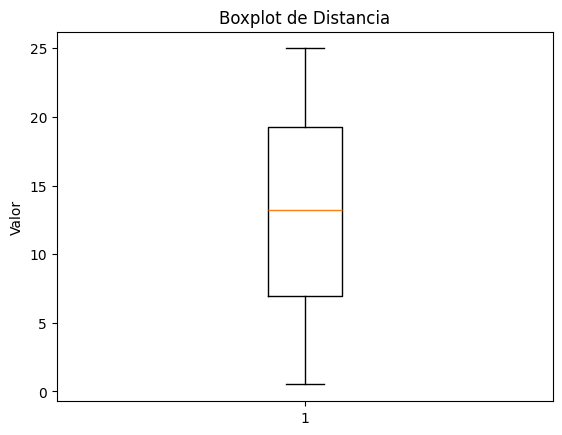

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['Distancia'])
plt.title('Boxplot de Distancia')
plt.ylabel('Valor')
plt.show()
